In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# One sample T-test

Digunakan untuk membandingkan hasil dari eksperimen yang tidak memiliki benchmark sebelumnya

# Contoh Pengujian Hipotesis Satu Populasi

In [33]:
# https://docs.google.com/spreadsheets/d/1x3abnbEGqMqYlPoDqss5Puxkx0B9owImUENxGGtXdm4/edit?gid=235186554#gid=235186554
google_sheets_link = 'https://docs.google.com/spreadsheets/d/1x3abnbEGqMqYlPoDqss5Puxkx0B9owImUENxGGtXdm4/export?format=csv'
df = pd.read_csv(google_sheets_link, sep=',')

df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


## Menghitung secara manual

In [4]:
nilai = [74, 49, 68, 86, 80, 71, 77, 81, 72, 77]

In [5]:
np.mean(nilai)

73.5

In [6]:
x_bar = np.mean(nilai)
mu = 80
s = np.std(nilai, ddof = 1)
n = len(nilai)

t_stat = (x_bar - mu) / (s / np.sqrt(n))

print(t_stat)

-2.0346749160869684


In [7]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(nilai, 80)

In [8]:
if p_value < 0.05:
    print("H0 ditolak")
else:
    print("H0 diserahkan")

H0 diserahkan


p_value -> tergantung dari kesepakatam peneliti -> 1%, 5%, 10%
-> peluang kesalahan ketika kita menolak H0
-> 100 test -> hanya ada x% tes yang tidak memenuhi H0
-> 5% -> ada 5 test yang nilai rata-rata nya boleh di bawah sm dgn 80

# Contoh Implementasi

In [11]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [10]:
variant_revenue = df.loc[df["VARIANT_NAME"] == "variant", "REVENUE"]
variant_revenue

0       0.00
4       0.00
5       0.00
8       0.00
13      2.15
        ... 
9991    0.00
9992    0.00
9993    0.00
9996    0.00
9997    0.00
Name: REVENUE, Length: 5016, dtype: float64

In [12]:
variant_revenue.describe()

count    5016.000000
mean        0.070070
std         1.314802
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        58.630000
Name: REVENUE, dtype: float64

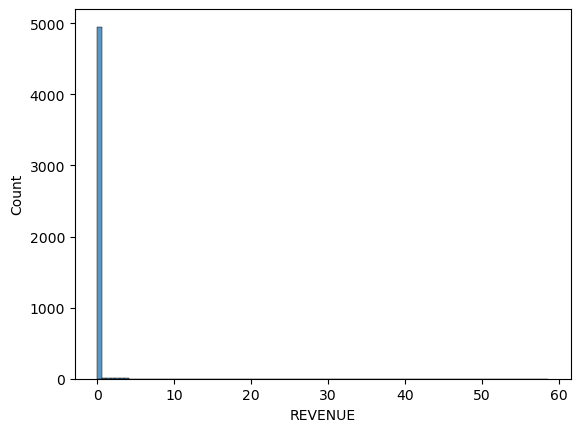

In [15]:
sns.histplot(data=variant_revenue, bins=100)
plt.show()

In [17]:
t_stat, p_value = ttest_1samp(variant_revenue, 0)
print("t_stat :", t_stat)
print("p_value :", p_value)

t_stat : 3.774410929668571
p_value : 0.00016223887213175306


In [18]:
if p_value < 0.05:
    print("H0 ditolak")
else:
    print("H0 diserahkan")

H0 ditolak


## Contoh Pengujian Hipotesis Dua Populasi

In [19]:
from scipy.stats import norm

norm.rvs(loc = 70, scale = 10, size = 10).round().astype("int")

array([76, 73, 69, 69, 83, 69, 67, 38, 90, 61])

In [20]:
kelas_1 = [74, 49, 68, 86, 80, 71, 77, 81, 72, 77]
kelas_2 = [78, 57, 65, 82, 73, 76, 54, 58]

In [21]:
x_bar1 = np.mean(kelas_1)
s1 = np.std(kelas_1, ddof = 1)
n1 = len(kelas_1)

x_bar2 = np.mean(kelas_2)
s2 = np.std(kelas_2, ddof = 1)
n2 = len(kelas_2)

In [22]:
print(f"Standard deviasi kelas 1: {s1}")
print(f"Standard deviasi kelas 2: {s2}")

Standard deviasi kelas 1: 10.102254973794492
Standard deviasi kelas 2: 10.76286605483343


In [23]:
df = n1 + n2 - 2
sp = np.sqrt(((n1 - 1) * np.power(s1, 2) + (n2 - 1) * np.power(s2, 2)) / df)

In [24]:
t_stat = (x_bar1 - x_bar2) / (sp * np.sqrt(1/n1 + 1/n2))
print(t_stat)

1.140634940065406


In [25]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(kelas_1, kelas_2, equal_var=True)

In [26]:
if p_value < 0.05:
  print("Nilai kelas 1 dan kelas 2 berbeda")
else:
  print("Nilai kelas 1 dan kelas 2 sama")

Nilai kelas 1 dan kelas 2 sama


In [27]:
t_stat

1.140634940065406

In [28]:
p_value

0.2708083866673808

In [34]:
variant_revenue = df.loc[df["VARIANT_NAME"] == "variant", "REVENUE"]

control_revenue = df.loc[df["VARIANT_NAME"] == "control", "REVENUE"]

In [35]:
variant_revenue.describe()

count    5016.000000
mean        0.070070
std         1.314802
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        58.630000
Name: REVENUE, dtype: float64

In [36]:
control_revenue.describe()

count    4984.000000
mean        0.129013
std         3.007524
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       196.010000
Name: REVENUE, dtype: float64

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

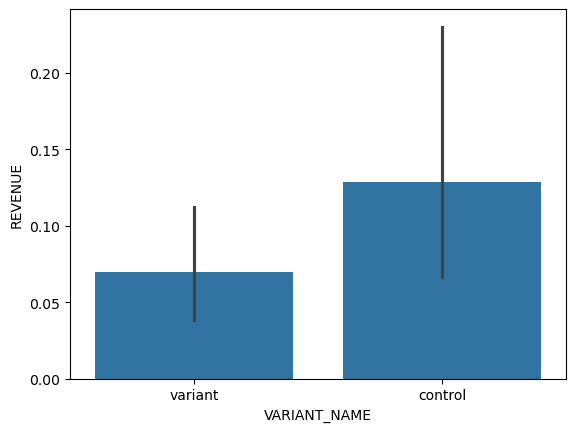

In [37]:
sns.barplot(data=df, x="VARIANT_NAME", y="REVENUE")

In [38]:
t_stat, p_value = ttest_ind(variant_revenue, control_revenue, equal_var=False)

In [39]:
t_stat

-1.268403803110966

In [40]:
p_value

0.20469713432410777

In [41]:
df.groupby("VARIANT_NAME")["REVENUE"].apply(lambda x: sum(x > 0))

VARIANT_NAME
control    80
variant    72
Name: REVENUE, dtype: int64

## Contoh Pengujian Hipotesis Dua Populasi Berpasangan

In [42]:
sebelum = [59, 71, 64, 75, 75, 61, 52, 66, 71, 69]
sesudah = [98, 91, 86, 72, 77, 54, 69, 89, 66, 87]

In [43]:
beda = np.array(sesudah) - np.array(sebelum)
x_beda = np.mean(beda)
sd = np.std(beda, ddof = 1)
n = len(beda)
mu = 0

In [44]:
t_stat = (x_beda - mu) / (sd / np.sqrt(n))

In [45]:
t_stat

2.6423876827871844

In [46]:
from scipy.stats import ttest_rel

In [47]:
t_stat, p_value = ttest_rel(sesudah, sebelum)

In [48]:
if p_value < 0.05:
  print("Nilai sesudah berbeda daripada nilai sebelum")
else:
  print("Nilai sesudah sama dengan nilai sebelum")

Nilai sesudah berbeda daripada nilai sebelum


In [49]:
t_stat

2.6423876827871844

## Uji Beda Proporsi

In [50]:
perempuan_selamat = 233
total_perempuan = 314
laki_selamat = 109
total_laki = 577

In [51]:
proporsi_perempuan = perempuan_selamat / total_perempuan
proporsi_laki = laki_selamat / total_laki

prop_gabungan = (perempuan_selamat + laki_selamat) / (total_perempuan + total_laki)

In [52]:
t_stat = (proporsi_perempuan - proporsi_laki) / np.sqrt(prop_gabungan * (1 - prop_gabungan) * (1/ total_perempuan + 1/ total_laki))
print(t_stat)

16.218833930670097


In [53]:
from statsmodels.stats.proportion import proportions_ztest

In [54]:
proportions_ztest([perempuan_selamat, laki_selamat], [total_perempuan, total_laki])

(16.218833930670097, 3.7117477701134797e-59)

In [55]:
proporsi_laki

0.18890814558058924

In [56]:
from statsmodels.stats.proportion import proportions_ztest

In [57]:
control_revneue_positive = df.loc[(df["VARIANT_NAME"] == "control") & (df["REVENUE"] > 0)]["USER_ID"].nunique()
variant_revneue_positive = df.loc[(df["VARIANT_NAME"] == "variant") & (df["REVENUE"] > 0)]["USER_ID"].nunique()

In [58]:
df.groupby("VARIANT_NAME")["USER_ID"].nunique()

VARIANT_NAME
control    3931
variant    3934
Name: USER_ID, dtype: int64

In [60]:
t_stat, p_value = proportions_ztest([control_revneue_positive, variant_revneue_positive], [3931, 3934])

In [61]:
if p_value < 0.05:
  print("H0 ditolak")
else:
  print("H0 diserahkan")

H0 diserahkan
